# Introduction to Machine Learning: Programming Assignment 1

In this assignment, we will explore the basics of machine learning using the "20 newsgroups" text dataset. We'll cover fundamental ML concepts and models, including Linear Models, Decision Trees, and Neural Networks. The goal is to classify text examples into their respective news categories.

**Useful Resources:**
- **Linear Models:**  
  - [Understanding Linear Models](https://www.youtube.com/watch?v=nk2CQITm_eo) - YouTube  

- **Decision Trees:**  
  - [Decision Trees Explained](https://www.youtube.com/watch?v=7VeUPuFGJHk) - YouTube  

- **Neural Networks:**  
  - [Introduction to Neural Networks](https://www.youtube.com/watch?v=aircAruvnKk) - YouTube  

Please ensure you explore these resources to gain a deeper understanding and practical insight into each topic, which will be invaluable as you work through the assignment.


# The 20 Newsgroups Text Dataset

The "20 newsgroups" dataset is a collection of approximately 20,000 newsgroup documents, partitioned nearly evenly across 20 different newsgroups. Each newsgroup corresponds to a different topic, making this dataset ideal for experiments in text applications of machine learning techniques, such as text classification and text clustering. In this assignment we only focus on the task of clustering documents into their corresponding topic classes.


## Loading and exploring the dataset (6pts)

Let's start by loading the dataset. you'll have to use the `fetch_20newsgroups` function from [`sklearn.datasets`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html):


In [68]:
from sklearn.datasets import fetch_20newsgroups

# Load the training section of the dataset
newsgroups_data = fetch_20newsgroups(subset='train')

# Explore the loaded data
print(newsgroups_data.data[0])
print(newsgroups_data.data[500])
article_len = [len(article.split()) for article in newsgroups_data.data]
print(article_len)

# Print number of the training articles
print(f"No of training articles: {len(newsgroups_data.data)}")

# Print number of categories
print(f"No of categories: {len(newsgroups_data.target_names)}")

# Print first 5 category names
print("First 5 category names:")
for cat in newsgroups_data.target_names[:5]:
    print(f" {cat}")



From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





From: bjorndahl@augustana.ab.ca
Subject: Re: document of .RTF
Organization: Augustana University College, Camrose, Alberta
Lines: 10

In article <1993Mar30.113436.7339@worak.kaist.ac.kr>, tjyu@eve.kaist.ac.kr (Yu TaiJung) writes:
> Does anybody have document of .RTF file or kno

## visualizing number of examples in each category (4 pts)

Create a barplot using `seaborn` or `matplotlib` library to show the number of examples in each newsgroup
x-axis should show the newsgroup title and y-axis the number of articles.

Both [`seaborn`](https://seaborn.pydata.org/) and [`matplotlib`](https://matplotlib.org/stable/) are popular libraries for visualization in python. You can use any of them to complete this task.

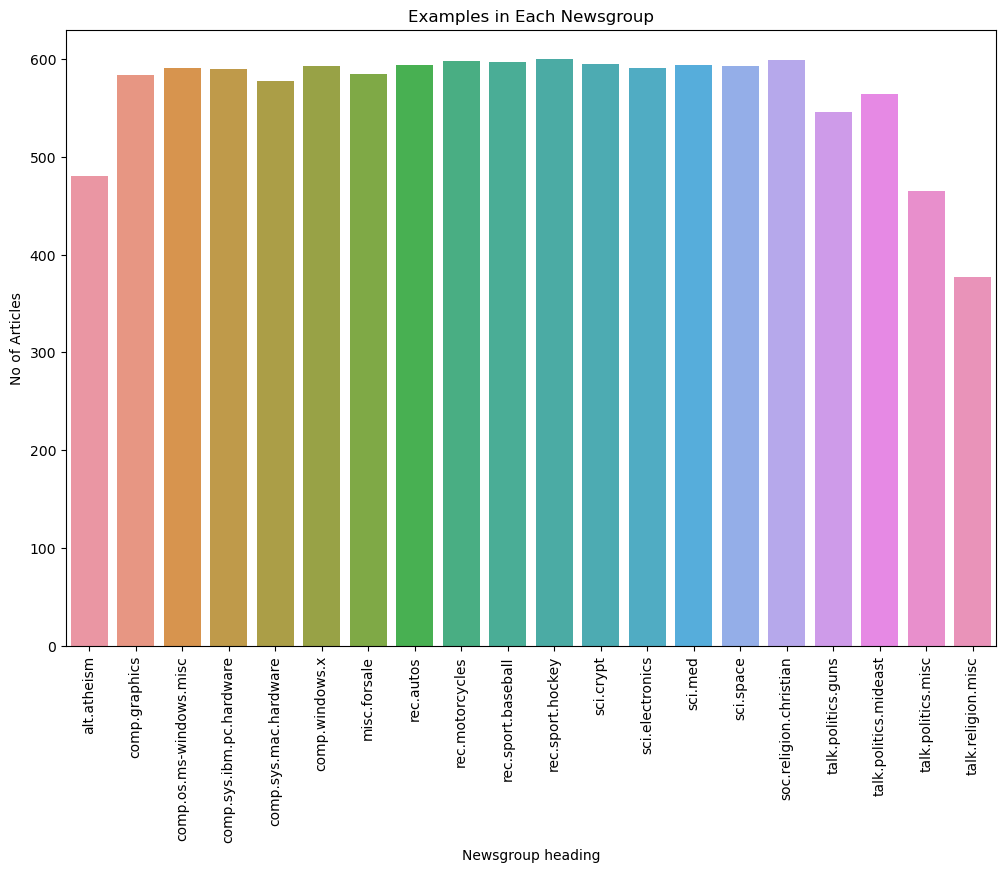

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Count the occurrences of each category
unique_label, counts = np.unique(newsgroups_data.target, return_counts=True)

#  Map numerical labels to category names
categories = [newsgroups_data.target_names[i] for i in unique_label]

# Plot the counts using seaborn for a better look
plt.figure(figsize=(12, 8))
sns.barplot(x=categories, y=counts)
plt.xticks(rotation=90) 
plt.xlabel('Newsgroup heading')
plt.ylabel('No of Articles')
plt.title('Examples in Each Newsgroup')
plt.show()



# Featurizing Text (10pts)

To use textual data for machine learning models, we need to convert the text into numerical values. In this section we'll explore a basic approach for converting a document into numerical vecotors called `Bag of Words (BoW)`

## Bag of Words (BoW)
Bag of Words is a simple yet effective technique in text processing. It involves representing text data by counting the frequency of each word in a document, disregarding grammar and word order.
For more information about what a BoW representation is you can refer to the beginning of [this video](https://www.youtube.com/watch?v=nZromH6F7R0)

Load the training section of the dataset and using sklearn's [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) build a count vectorizer over it. **Your vectorizer should take 1-grams and 2-grams as feature and remove english stop words. Also it should only take n-grams which at most appear in 80% of the documents and at least appear in 0.1% of documents.**

Then transform both training and test datasets
to to bag of word representations and write out the shape of both training and test datasets:

**shape of a numpy array x can be found using** `x.shape`



In [9]:
from sklearn.feature_extraction.text import CountVectorizer

# Load training and test portions of the dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# Initialize the CountVectorizer with required parameters
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', max_df=0.8, min_df=0.001)

# Build count vectors from the dataset
X_train_counts = vectorizer.fit_transform(newsgroups_train.data)
X_test_counts = vectorizer.transform(newsgroups_test.data)

# print shape of the trainig and test datasets
print("Shape of Training Data:", X_train_counts.shape)
print("Shape of Test Data:", X_test_counts.shape)


Shape of Training Data: (11314, 21231)
Shape of Test Data: (7532, 21231)


# Logistic Regression

## Training and Evaluating Logistic Regression Model on BoW features (30pts)

Logistic Regression is a foundational statistical method in machine learning for predicting a continuous variable. This section delves into training a Logistic Regression model (a linear model used for classification tasks), focusing on the '20 newsgroups' dataset. You'll learn to split the dataset, initialize the model, fit the model to your training data, and evaluate its performance on the test set. This hands-on experience will solidify your understanding of linear models in a classification context.

You are supposed to use [sklearn.linear_model.LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) For this section. 'LogisticRegressionCV' is a logistic regression model with built-in cross validation capability. Read the document carefully and implement the following steps:

- Define a Logistic Regression model with L2 regularization that runs for 100 iterations and 4-fold cross validation
- Train the model over the BoW features of the training data from previous step
- Measure accuracy, precision, recall and F1 score of the trained model over test dataset

For measuring the metrics you can use `sklearn` library as well. Note that since we have a non-binary classification we need to average precision, recall and f1 metrics. For averaging use `macro` aggregation.

In [60]:
%%time 

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegressionCV(cv=4, max_iter=100, penalty='l2', scoring='accuracy', solver='lbfgs', random_state=42)


# Fit the model to the training data
logistic_regression_model.fit(X_train_counts, newsgroups_train.target)
# Predict the labels on the test set and measure metrics
predicted_labels = logistic_regression_model.predict(X_test_counts)
accuracy = accuracy_score(newsgroups_test.target, predicted_labels)
precision = precision_score(newsgroups_test.target, predicted_labels, average='macro')
recall = recall_score(newsgroups_test.target, predicted_labels, average='macro')
f1 = f1_score(newsgroups_test.target, predicted_labels, average='macro')
print(f"Accuracy: {accuracy},Precision:{precision},Recall: {recall},F1 Score: {f1}")



C:\Users\hemus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hemus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 0.7922198619224642,Precision:0.7915610962859446,Recall: 0.7858428381505309,F1 Score: 0.7865285365151877
CPU times: total: 8min 24s
Wall time: 16min 29s


## Analyzing the words that affected the model's prediction the most (10pts)

We want to analyze the trained logistic regression model to understand which words or phrases has affected it's
decision more than the others. Use the model trained on TF-IDF features. Analyze the coefficients of the trained model for each class and print top-10 features along with their coefficient. For example we might have the following list for the class `comp.sys.mac.hardware`:

Top 10 influential features for class comp.sys.mac.hardware along with their coefficients:
- graphics: 6.6885
- 3d: 4.4008
- image: 4.2847
- images: 3.7164
- points: 3.2585
- 42: 3.0768
- files: 3.0405
- format: 2.7708
- algorithm: 2.6922
- surface: 2.5074

In [69]:
feature_names = np.array(vectorizer.get_feature_names_out())
for cls_index, cls_label in enumerate(newsgroups_train.target_names):
    tten_indices = logistic_regression_model.coef_[cls_index].argsort()[-10:][::-1]
    tten_features = feature_names[tten_indices]
    tten_coefficients = logistic_regression_model.coef_[cls_index][tten_indices]

    print(f"Top ten influential features for class {cls_label}  with their coefficients:")
    for feature, coefficient in zip(tten_features, tten_coefficients):
        print(f"{feature}:  {coefficient:.5f}")
    print("\n")



Top ten influential features for class alt.atheism  with their coefficients:
bible:  0.60403
atheism:  0.59044
atheists:  0.58594
keith:  0.54862
god:  0.50076
islamic:  0.41692
writes:  0.41085
believing:  0.40496
mathew:  0.38612
book:  0.36775


Top ten influential features for class comp.graphics  with their coefficients:
graphics:  1.35350
3d:  0.85522
image:  0.85343
images:  0.76191
pov:  0.72938
animation:  0.63428
3do:  0.62209
tiff:  0.62089
imagine:  0.61516
24:  0.59851


Top ten influential features for class comp.os.ms-windows.misc  with their coefficients:
windows:  1.78066
cica:  0.74986
file:  0.69762
win3:  0.61798
drivers:  0.59596
driver:  0.56479
win:  0.55237
change:  0.50356
files:  0.48820
nt:  0.45332


Top ten influential features for class comp.sys.ibm.pc.hardware  with their coefficients:
monitor:  0.74675
pc:  0.68128
gateway:  0.61714
ide:  0.60115
card:  0.57565
486:  0.56443
disk:  0.56215
pentium:  0.53075
motherboard:  0.52573
scsi:  0.51984


Top ten 

# Training and Evaluating Simple Neural Network Model (30pts)

The Multi-Layer Perceptron (MLP) is a versatile algorithm in machine learning, capable of handling complex patterns in data through its layered structure of neurons. This section is dedicated to training a Multi-Layer Perceptron model using the '20 newsgroups' dataset, focusing on its application in classification tasks. You will go through the process of splitting the dataset, initializing the MLP model, fitting the model with your training data, and evaluating its performance on the test set. This practical exercise will enhance your understanding of neural networks in the realm of classification.

For this section, you are asked to utilize [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). 'MLPClassifier' is an implementation of a multi-layer perceptron classifier. Carefully review the documentation and carry out the following steps:

- Define a Multi-Layer Perceptron model with at two hidden layers of size 100 and `sigmoid` activation function. Use a batch size of 128 and train the model for 25 iterations.
- Train the MLP model using the Bag of Words (BoW) features of the training data obtained in the previous step.
- Assess the accuracy, precision, recall, and F1 score of the MLP model on the test dataset.

For the evaluation metrics, continue to use the `sklearn.metrics` module. Given the non-binary nature of the classification in this dataset, ensure to average the precision, recall, and F1 metrics using the 'macro' strategy to account for the imbalance across classes.


In [63]:
%%time

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Multi-Layer Perceptron model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='logistic', batch_size=128, max_iter=25, random_state=42)

# Fit the model to the training data
mlp_model.fit(X_train_counts, newsgroups_train.target)

# Predict the labels on the test set and measure metrics
predicted_labels = mlp_model.predict(X_test_counts)
accuracy = accuracy_score(newsgroups_test.target, predicted_labels)
precision = precision_score(newsgroups_test.target, predicted_labels, average='macro')
recall = recall_score(newsgroups_test.target, predicted_labels, average='macro')
f1 = f1_score(newsgroups_test.target, predicted_labels, average='macro')
print(f"Accuracy: {accuracy},Precision: {precision},Recall: {recall},F1 Score: {f1}")

C:\Users\hemus\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8267392458842273,Precision: 0.8275347225802575,Recall: 0.8211549186219461,F1 Score: 0.8220380354898615
CPU times: total: 5min 40s
Wall time: 7min 12s


# Comparison (10pts)

Compare the performance of both models using barplots. More specifically, generate a **single** barplot with x-axis labeled with `precision`, `recall`, `f1` and `accuracy` and y-axis being the corresponding values. For each of the metrics plot the corresponding values from logistic regression and neural network models. Your Final plot should look like this:



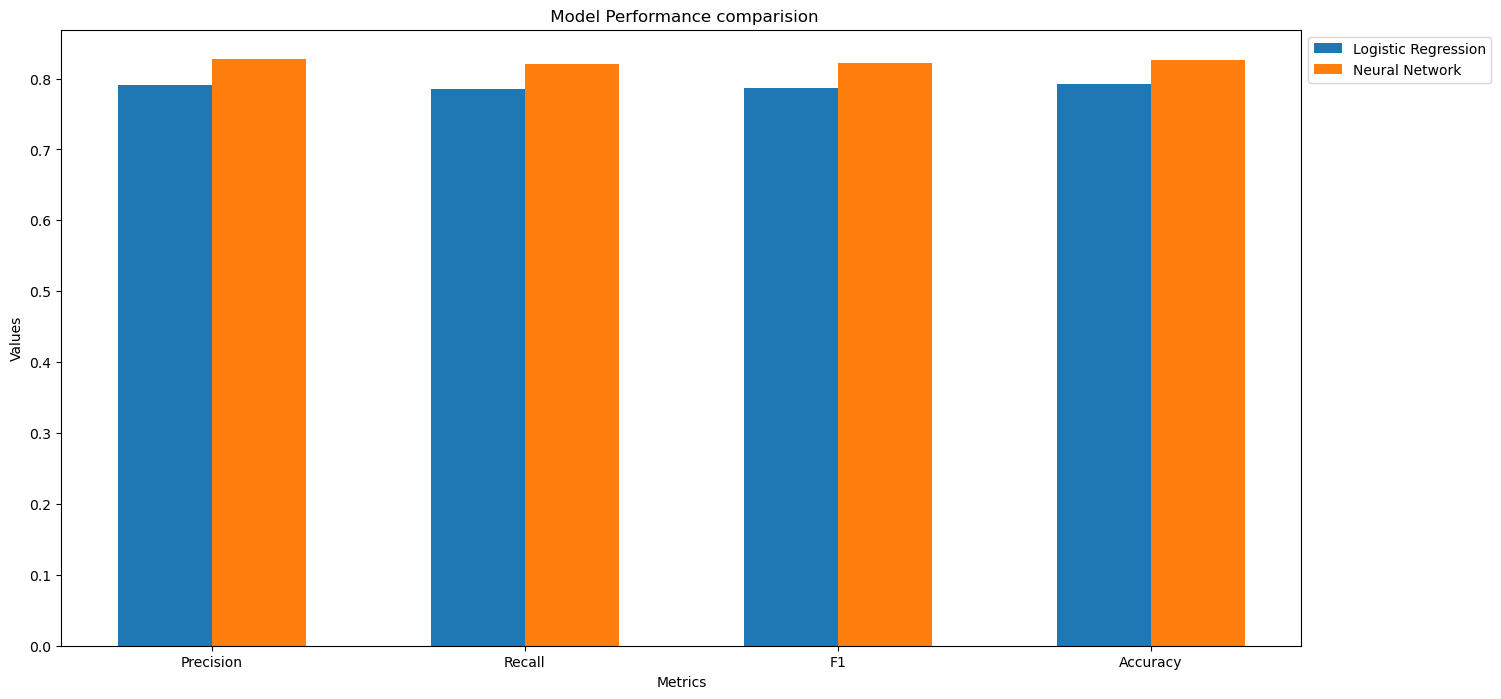

In [71]:
# Metrics for logistic regression and neural network(taken from previous outputs)
metrics_logistic = [0.7915610962859446, 0.7858428381505309, 0.7865285365151877, 0.7922198619224642]
metrics_neural = [0.8275347225802575,  0.8211549186219461, 0.8220380354898615, 0.8267392458842273]

# Labels for the metrics
labels = ['Precision','Recall','F1','Accuracy']

# Setting the positions and width for the bars
position = np.arange(len(labels))
width = 0.30

# Plotting both logistic regression and neural network metrics
plt.figure(figsize=(16, 8))
plt.bar(position - width/2, metrics_logistic, width, label='Logistic Regression')
plt.bar(position + width/2, metrics_neural, width, label='Neural Network')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title(' Model Performance comparision')
plt.xticks(position, labels)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


